In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
scaler = MinMaxScaler()
regressor = LinearRegression()

In [ ]:
!wget http://azuremlsamples.azureml.net/templatedata/PM_train.txt 
!wget http://azuremlsamples.azureml.net/templatedata/PM_test.txt
!wget http://azuremlsamples.azureml.net/templatedata/PM_truth.txt

--2022-07-01 05:09:12--  http://azuremlsamples.azureml.net/templatedata/PM_train.txt
Resolving azuremlsamples.azureml.net (azuremlsamples.azureml.net)... 13.107.246.40, 13.107.213.40, 2620:1ec:bdf::40, ...
Connecting to azuremlsamples.azureml.net (azuremlsamples.azureml.net)|13.107.246.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3515356 (3.4M) [text/plain]
Saving to: ‘PM_train.txt’

PM_train.txt        100%[===================>]   3.35M  --.-KB/s    in 0.1s    

2022-07-01 05:09:12 (25.3 MB/s) - ‘PM_train.txt’ saved [3515356/3515356]

--2022-07-01 05:09:12--  http://azuremlsamples.azureml.net/templatedata/PM_test.txt
Resolving azuremlsamples.azureml.net (azuremlsamples.azureml.net)... 13.107.246.40, 13.107.213.40, 2620:1ec:bdf::40, ...
Connecting to azuremlsamples.azureml.net (azuremlsamples.azureml.net)|13.107.246.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2228855 (2.1M) [text/plain]
Saving to: ‘PM_test.txt’

PM_test.txt

In [ ]:
train_data = pd.read_csv('PM_train.txt', sep=" ")
test_data = pd.read_csv('PM_test.txt', sep=" ")
truth_data = pd.read_csv('PM_truth.txt', sep=" ", header=None)

In [ ]:
train_data

1  1.1  -0.0007  -0.0004  100.0  518.67  641.82  1589.70  1400.60  \
0        1    2   0.0019  -0.0003  100.0  518.67  642.15  1591.82  1403.14   
1        1    3  -0.0043   0.0003  100.0  518.67  642.35  1587.99  1404.20   
2        1    4   0.0007   0.0000  100.0  518.67  642.35  1582.79  1401.87   
3        1    5  -0.0019  -0.0002  100.0  518.67  642.37  1582.85  1406.22   
4        1    6  -0.0043  -0.0001  100.0  518.67  642.10  1584.47  1398.37   
...    ...  ...      ...      ...    ...     ...     ...      ...      ...   
20625  100  196  -0.0004  -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20626  100  197  -0.0016  -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20627  100  198   0.0004   0.0000  100.0  518.67  643.42  1602.46  1428.18   
20628  100  199  -0.0011   0.0003  100.0  518.67  643.23  1605.26  1426.53   
20629  100  200  -0.0032  -0.0005  100.0  518.67  643.85  1600.38  1432.14   

       14.62  ...  8138.62  8.4195  0.03  392  2388  100.00  39.06  23.4190  \
0      14.62  ...  8131.49  8.4318  0.03  392  2388   100.0  39.00  23.4236   
1      14.62  ...  8133.23  8.4178  0.03  390  2388   100.0  38.95  23.3442   
2      14.62  ...  8133.83  8.3682  0.03  392  2388   100.0  38.88  23.3739   
3      14.62  ...  8133.80  8.4294  0.03  393  2388   100.0  38.90  23.4044   
4      14.62  ...  8132.85  8.4108  0.03  391  2388   100.0  38.98  23.3669   
...      ...  ...      ...     ...   ...  ...   ...     ...    ...      ...   
20625  14.62  ...  8137.60  8.4956  0.03  397  2388   100.0  38.49  22.9735   
20626  14.62  ...  8136.50  8.5139  0.03  395  2388   100.0  38.30  23.1594   
20627  14.62  ...  8141.05  8.5646  0.03  398  2388   100.0  38.44  22.9333   
20628  14.62  ...  8139.29  8.5389  0.03  395  2388   100.0  38.29  23.0640   
20629  14.62  ...  8137.33  8.5036  0.03  396  2388   100.0  38.37  23.0522   

       Unnamed: 26  Unnamed: 27  
0              NaN          NaN  
1              NaN          NaN  
2              NaN          NaN  
3              NaN          NaN  
4              NaN          NaN  
...            ...          ...  
20625          NaN          NaN  
20626          NaN          NaN  
20627          NaN          NaN  
20628          NaN          NaN  
20629          NaN          NaN  

[20630 rows x 28 columns]

In [ ]:
test_data

1  1.1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21  \
0        1    2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42   
1        1    3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34   
2        1    4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42   
3        1    5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92   
4        1    6  0.0012  0.0003  100.0  518.67  642.11  1579.12  1395.13   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
13090  100  194  0.0049  0.0000  100.0  518.67  643.24  1599.45  1415.79   
13091  100  195 -0.0011 -0.0001  100.0  518.67  643.22  1595.69  1422.05   
13092  100  196 -0.0006 -0.0003  100.0  518.67  643.44  1593.15  1406.82   
13093  100  197 -0.0038  0.0001  100.0  518.67  643.26  1594.99  1419.36   
13094  100  198  0.0013  0.0003  100.0  518.67  642.95  1601.62  1424.99   

       14.62  ...  8125.55  8.4052  0.03  392  2388  100.00  38.86  23.3735  \
0      14.62  ...  8139.62  8.3803  0.03  393  2388   100.0  39.02  23.3916   
1      14.62  ...  8130.10  8.4441  0.03  393  2388   100.0  39.08  23.4166   
2      14.62  ...  8132.90  8.3917  0.03  391  2388   100.0  39.00  23.3737   
3      14.62  ...  8129.54  8.4031  0.03  390  2388   100.0  38.99  23.4130   
4      14.62  ...  8127.46  8.4238  0.03  392  2388   100.0  38.91  23.3467   
...      ...  ...      ...     ...   ...  ...   ...     ...    ...      ...   
13090  14.62  ...  8213.28  8.4715  0.03  394  2388   100.0  38.65  23.1974   
13091  14.62  ...  8210.85  8.4512  0.03  395  2388   100.0  38.57  23.2771   
13092  14.62  ...  8217.24  8.4569  0.03  395  2388   100.0  38.62  23.2051   
13093  14.62  ...  8220.48  8.4711  0.03  395  2388   100.0  38.66  23.2699   
13094  14.62  ...  8214.64  8.4903  0.03  396  2388   100.0  38.70  23.1855   

       Unnamed: 26  Unnamed: 27  
0              NaN          NaN  
1              NaN          NaN  
2              NaN          NaN  
3              NaN          NaN  
4              NaN          NaN  
...            ...          ...  
13090          NaN          NaN  
13091          NaN          NaN  
13092          NaN          NaN  
13093          NaN          NaN  
13094          NaN          NaN  

[13095 rows x 28 columns]

In [ ]:
truth_data

0   1
0   112 NaN
1    98 NaN
2    69 NaN
3    82 NaN
4    91 NaN
..  ...  ..
95  137 NaN
96   82 NaN
97   59 NaN
98  117 NaN
99   20 NaN

[100 rows x 2 columns]

In [ ]:
train_data.columns = ['id', 'cycles_completed', 'setting1', 'setting2', 'setting3', 'sensor1', 'sensor2', 'sensor3','sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
                      'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21', 
                      'Unnamed1', 'Unnamed2']

In [ ]:
test_data.columns = ['id', 'cycles_completed', 'setting1', 'setting2', 'setting3', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
                     'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21',
                     'Unnamed1', 'Unnamed2']

In [ ]:
truth_data.columns = ['remaining_cycles', 'Unnamed']

In [ ]:
missing_data = pd.DataFrame({"total missing" : train_data.isnull().sum(), "percentage missing" :(train_data.isnull().sum()/20630)*100})
 

In [ ]:
missing_data = pd.DataFrame({"total missing" : test_data.isnull().sum(), "percentage missing" :(test_data.isnull().sum()/13095)*100})
missing_data

total missing  percentage missing
id                            0                 0.0
cycles_completed              0                 0.0
setting1                      0                 0.0
setting2                      0                 0.0
setting3                      0                 0.0
sensor1                       0                 0.0
sensor2                       0                 0.0
sensor3                       0                 0.0
sensor4                       0                 0.0
sensor5                       0                 0.0
sensor6                       0                 0.0
sensor7                       0                 0.0
sensor8                       0                 0.0
sensor9                       0                 0.0
sensor10                      0                 0.0
sensor11                      0                 0.0
sensor12                      0                 0.0
sensor13                      0                 0.0
sensor14                      0                 0.0
sensor15                      0                 0.0
sensor16                      0                 0.0
sensor17                      0                 0.0
sensor18                      0                 0.0
sensor19                      0                 0.0
sensor20                      0                 0.0
sensor21                      0                 0.0
Unnamed1                  13095               100.0
Unnamed2                  13095               100.0

In [ ]:
missing_data = pd.DataFrame({"total missing" : truth_data.isnull().sum(), "percentage missing" :(truth_data.isnull().sum()/100)*100})
missing_data

total missing  percentage missing
remaining_cycles              0                 0.0
Unnamed                     100               100.0

In [ ]:
train_data.drop(train_data.columns[[26,27]], axis = 1, inplace = True)

In [ ]:
test_data.drop(test_data.columns[[26,27]], axis = 1, inplace = True)

In [ ]:
truth_data.drop(truth_data.columns[[1]], axis = 1, inplace = True)

In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20630 entries, 0 to 20629
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20630 non-null  int64  
 1   cycles_completed  20630 non-null  int64  
 2   setting1          20630 non-null  float64
 3   setting2          20630 non-null  float64
 4   setting3          20630 non-null  float64
 5   sensor1           20630 non-null  float64
 6   sensor2           20630 non-null  float64
 7   sensor3           20630 non-null  float64
 8   sensor4           20630 non-null  float64
 9   sensor5           20630 non-null  float64
 10  sensor6           20630 non-null  float64
 11  sensor7           20630 non-null  float64
 12  sensor8           20630 non-null  float64
 13  sensor9           20630 non-null  float64
 14  sensor10          20630 non-null  float64
 15  sensor11          20630 non-null  float64
 16  sensor12          20630 non-null  float6

In [ ]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13095 entries, 0 to 13094
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13095 non-null  int64  
 1   cycles_completed  13095 non-null  int64  
 2   setting1          13095 non-null  float64
 3   setting2          13095 non-null  float64
 4   setting3          13095 non-null  float64
 5   sensor1           13095 non-null  float64
 6   sensor2           13095 non-null  float64
 7   sensor3           13095 non-null  float64
 8   sensor4           13095 non-null  float64
 9   sensor5           13095 non-null  float64
 10  sensor6           13095 non-null  float64
 11  sensor7           13095 non-null  float64
 12  sensor8           13095 non-null  float64
 13  sensor9           13095 non-null  float64
 14  sensor10          13095 non-null  float64
 15  sensor11          13095 non-null  float64
 16  sensor12          13095 non-null  float6

In [ ]:
print(truth_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   remaining_cycles  100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes
None


In [ ]:
columns_to_be_normalized = train_data.columns.difference(['id','cycles_completed'])
columns_not_normalized = train_data.columns.difference(columns_to_be_normalized)

In [ ]:
scaled_train = pd.DataFrame(scaler.fit_transform(train_data[columns_to_be_normalized]), columns=columns_to_be_normalized, index=train_data.index)

In [ ]:
train_data_combine = train_data[columns_not_normalized].join(scaled_train)
train_data = train_data_combine.reindex(columns = train_data.columns)

In [ ]:
train_data

id  cycles_completed  setting1  setting2  setting3  sensor1   sensor2  \
0        1                 2  0.609195  0.250000       0.0      0.0  0.283133   
1        1                 3  0.252874  0.750000       0.0      0.0  0.343373   
2        1                 4  0.540230  0.500000       0.0      0.0  0.343373   
3        1                 5  0.390805  0.333333       0.0      0.0  0.349398   
4        1                 6  0.252874  0.416667       0.0      0.0  0.268072   
...    ...               ...       ...       ...       ...      ...       ...   
20625  100               196  0.477011  0.250000       0.0      0.0  0.686747   
20626  100               197  0.408046  0.083333       0.0      0.0  0.701807   
20627  100               198  0.522989  0.500000       0.0      0.0  0.665663   
20628  100               199  0.436782  0.750000       0.0      0.0  0.608434   
20629  100               200  0.316092  0.083333       0.0      0.0  0.795181   

        sensor3   sensor4  sensor5  ...  sensor12  sensor13  sensor14  \
0      0.453019  0.352633      0.0  ...  0.765458  0.279412  0.162813   
1      0.369523  0.370527      0.0  ...  0.795309  0.220588  0.171793   
2      0.256159  0.331195      0.0  ...  0.889126  0.294118  0.174889   
3      0.257467  0.404625      0.0  ...  0.746269  0.235294  0.174734   
4      0.292784  0.272113      0.0  ...  0.637527  0.220588  0.169832   
...         ...       ...      ...  ...       ...       ...       ...   
20625  0.587312  0.782917      0.0  ...  0.170576  0.558824  0.194344   
20626  0.729453  0.866475      0.0  ...  0.211087  0.500000  0.188668   
20627  0.684979  0.775321      0.0  ...  0.281450  0.529412  0.212148   
20628  0.746021  0.747468      0.0  ...  0.208955  0.514706  0.203065   
20629  0.639634  0.842167      0.0  ...  0.130064  0.558824  0.192951   

       sensor15  sensor16  sensor17  sensor18  sensor19  sensor20  sensor21  
0      0.411312       0.0  0.333333       0.0       0.0  0.666667  0.731014  
1      0.357445       0.0  0.166667       0.0       0.0  0.627907  0.621375  
2      0.166603       0.0  0.333333       0.0       0.0  0.573643  0.662386  
3      0.402078       0.0  0.416667       0.0       0.0  0.589147  0.704502  
4      0.330512       0.0  0.250000       0.0       0.0  0.651163  0.652720  
...         ...       ...       ...       ...       ...       ...       ...  
20625  0.656791       0.0  0.750000       0.0       0.0  0.271318  0.109500  
20626  0.727203       0.0  0.583333       0.0       0.0  0.124031  0.366197  
20627  0.922278       0.0  0.833333       0.0       0.0  0.232558  0.053991  
20628  0.823394       0.0  0.583333       0.0       0.0  0.116279  0.234466  
20629  0.687572       0.0  0.666667       0.0       0.0  0.178295  0.218172  

[20630 rows x 26 columns]

In [ ]:
scaled_test = pd.DataFrame(scaler.fit_transform(test_data[columns_to_be_normalized]), columns=columns_to_be_normalized, index=test_data.index)

In [ ]:
test_data_combine = test_data[columns_not_normalized].join(scaled_test)
test_data = test_data_combine.reindex(columns = test_data.columns)

In [ ]:
test_data

id  cycles_completed  setting1  setting2  setting3  sensor1   sensor2  \
0        1                 2   0.34375  0.230769       0.0      0.0  0.182965   
1        1                 3   0.53125  0.538462       0.0      0.0  0.419558   
2        1                 4   0.77500  0.461538       0.0      0.0  0.413249   
3        1                 5   0.60000  0.461538       0.0      0.0  0.435331   
4        1                 6   0.58750  0.692308       0.0      0.0  0.309148   
...    ...               ...       ...       ...       ...      ...       ...   
13090  100               194   0.81875  0.461538       0.0      0.0  0.665615   
13091  100               195   0.44375  0.384615       0.0      0.0  0.659306   
13092  100               196   0.47500  0.230769       0.0      0.0  0.728707   
13093  100               197   0.27500  0.538462       0.0      0.0  0.671924   
13094  100               198   0.59375  0.692308       0.0      0.0  0.574132   

        sensor3   sensor4  sensor5  ...  sensor12  sensor13  sensor14  \
0      0.504025  0.225240      0.0  ...  0.634703  0.395349  0.277907   
1      0.464814  0.346130      0.0  ...  0.591324  0.325581  0.192892   
2      0.391587  0.449867      0.0  ...  0.456621  0.372093  0.217896   
3      0.471306  0.357974      0.0  ...  0.632420  0.325581  0.187891   
4      0.261750  0.219318      0.0  ...  0.579909  0.441860  0.169316   
...         ...       ...      ...  ...       ...       ...       ...   
13090  0.789665  0.641209      0.0  ...  0.299087  0.255814  0.935703   
13091  0.692028  0.769042      0.0  ...  0.381279  0.465116  0.914003   
13092  0.626071  0.458036      0.0  ...  0.410959  0.348837  0.971066   
13093  0.673851  0.714111      0.0  ...  0.445205  0.441860  1.000000   
13094  0.846014  0.829079      0.0  ...  0.385845  0.372093  0.947848   

       sensor15  sensor16  sensor17  sensor18  sensor19  sensor20  sensor21  
0      0.227709       0.0     0.500       0.0       0.0  0.645455  0.645718  
1      0.533557       0.0     0.500       0.0       0.0  0.700000  0.681104  
2      0.282359       0.0     0.250       0.0       0.0  0.627273  0.620382  
3      0.337009       0.0     0.125       0.0       0.0  0.618182  0.676008  
4      0.436242       0.0     0.375       0.0       0.0  0.545455  0.582166  
...         ...       ...       ...       ...       ...       ...       ...  
13090  0.664909       0.0     0.625       0.0       0.0  0.309091  0.370842  
13091  0.567593       0.0     0.750       0.0       0.0  0.236364  0.483652  
13092  0.594919       0.0     0.750       0.0       0.0  0.281818  0.381741  
13093  0.662991       0.0     0.750       0.0       0.0  0.318182  0.473461  
13094  0.755034       0.0     0.875       0.0       0.0  0.354545  0.353999  

[13095 rows x 26 columns]

In [ ]:
rul = pd.DataFrame(train_data.groupby('id')['cycles_completed'].max()).reset_index()
rul.columns = ['id', 'max_of_cycles']
rul

id  max_of_cycles
0     1            192
1     2            287
2     3            179
3     4            189
4     5            269
..  ...            ...
95   96            336
96   97            202
97   98            156
98   99            185
99  100            200

[100 rows x 2 columns]

In [ ]:
train_data = train_data.merge(rul, on=['id'], how='right')
train_data

id  cycles_completed  setting1  setting2  setting3  sensor1   sensor2  \
0        1                 2  0.609195  0.250000       0.0      0.0  0.283133   
1        1                 3  0.252874  0.750000       0.0      0.0  0.343373   
2        1                 4  0.540230  0.500000       0.0      0.0  0.343373   
3        1                 5  0.390805  0.333333       0.0      0.0  0.349398   
4        1                 6  0.252874  0.416667       0.0      0.0  0.268072   
...    ...               ...       ...       ...       ...      ...       ...   
20625  100               196  0.477011  0.250000       0.0      0.0  0.686747   
20626  100               197  0.408046  0.083333       0.0      0.0  0.701807   
20627  100               198  0.522989  0.500000       0.0      0.0  0.665663   
20628  100               199  0.436782  0.750000       0.0      0.0  0.608434   
20629  100               200  0.316092  0.083333       0.0      0.0  0.795181   

        sensor3   sensor4  sensor5  ...  sensor13  sensor14  sensor15  \
0      0.453019  0.352633      0.0  ...  0.279412  0.162813  0.411312   
1      0.369523  0.370527      0.0  ...  0.220588  0.171793  0.357445   
2      0.256159  0.331195      0.0  ...  0.294118  0.174889  0.166603   
3      0.257467  0.404625      0.0  ...  0.235294  0.174734  0.402078   
4      0.292784  0.272113      0.0  ...  0.220588  0.169832  0.330512   
...         ...       ...      ...  ...       ...       ...       ...   
20625  0.587312  0.782917      0.0  ...  0.558824  0.194344  0.656791   
20626  0.729453  0.866475      0.0  ...  0.500000  0.188668  0.727203   
20627  0.684979  0.775321      0.0  ...  0.529412  0.212148  0.922278   
20628  0.746021  0.747468      0.0  ...  0.514706  0.203065  0.823394   
20629  0.639634  0.842167      0.0  ...  0.558824  0.192951  0.687572   

       sensor16  sensor17  sensor18  sensor19  sensor20  sensor21  \
0           0.0  0.333333       0.0       0.0  0.666667  0.731014   
1           0.0  0.166667       0.0       0.0  0.627907  0.621375   
2           0.0  0.333333       0.0       0.0  0.573643  0.662386   
3           0.0  0.416667       0.0       0.0  0.589147  0.704502   
4           0.0  0.250000       0.0       0.0  0.651163  0.652720   
...         ...       ...       ...       ...       ...       ...   
20625       0.0  0.750000       0.0       0.0  0.271318  0.109500   
20626       0.0  0.583333       0.0       0.0  0.124031  0.366197   
20627       0.0  0.833333       0.0       0.0  0.232558  0.053991   
20628       0.0  0.583333       0.0       0.0  0.116279  0.234466   
20629       0.0  0.666667       0.0       0.0  0.178295  0.218172   

       max_of_cycles  
0                192  
1                192  
2                192  
3                192  
4                192  
...              ...  
20625            200  
20626            200  
20627            200  
20628            200  
20629            200  

[20630 rows x 27 columns]

In [ ]:
train_data['RUL'] = train_data['max_of_cycles'] - train_data['cycles_completed']
train_data.drop('max_of_cycles', axis=1, inplace=True) 
train_data

id  cycles_completed  setting1  setting2  setting3  sensor1   sensor2  \
0        1                 2  0.609195  0.250000       0.0      0.0  0.283133   
1        1                 3  0.252874  0.750000       0.0      0.0  0.343373   
2        1                 4  0.540230  0.500000       0.0      0.0  0.343373   
3        1                 5  0.390805  0.333333       0.0      0.0  0.349398   
4        1                 6  0.252874  0.416667       0.0      0.0  0.268072   
...    ...               ...       ...       ...       ...      ...       ...   
20625  100               196  0.477011  0.250000       0.0      0.0  0.686747   
20626  100               197  0.408046  0.083333       0.0      0.0  0.701807   
20627  100               198  0.522989  0.500000       0.0      0.0  0.665663   
20628  100               199  0.436782  0.750000       0.0      0.0  0.608434   
20629  100               200  0.316092  0.083333       0.0      0.0  0.795181   

        sensor3   sensor4  sensor5  ...  sensor13  sensor14  sensor15  \
0      0.453019  0.352633      0.0  ...  0.279412  0.162813  0.411312   
1      0.369523  0.370527      0.0  ...  0.220588  0.171793  0.357445   
2      0.256159  0.331195      0.0  ...  0.294118  0.174889  0.166603   
3      0.257467  0.404625      0.0  ...  0.235294  0.174734  0.402078   
4      0.292784  0.272113      0.0  ...  0.220588  0.169832  0.330512   
...         ...       ...      ...  ...       ...       ...       ...   
20625  0.587312  0.782917      0.0  ...  0.558824  0.194344  0.656791   
20626  0.729453  0.866475      0.0  ...  0.500000  0.188668  0.727203   
20627  0.684979  0.775321      0.0  ...  0.529412  0.212148  0.922278   
20628  0.746021  0.747468      0.0  ...  0.514706  0.203065  0.823394   
20629  0.639634  0.842167      0.0  ...  0.558824  0.192951  0.687572   

       sensor16  sensor17  sensor18  sensor19  sensor20  sensor21  RUL  
0           0.0  0.333333       0.0       0.0  0.666667  0.731014  190  
1           0.0  0.166667       0.0       0.0  0.627907  0.621375  189  
2           0.0  0.333333       0.0       0.0  0.573643  0.662386  188  
3           0.0  0.416667       0.0       0.0  0.589147  0.704502  187  
4           0.0  0.250000       0.0       0.0  0.651163  0.652720  186  
...         ...       ...       ...       ...       ...       ...  ...  
20625       0.0  0.750000       0.0       0.0  0.271318  0.109500    4  
20626       0.0  0.583333       0.0       0.0  0.124031  0.366197    3  
20627       0.0  0.833333       0.0       0.0  0.232558  0.053991    2  
20628       0.0  0.583333       0.0       0.0  0.116279  0.234466    1  
20629       0.0  0.666667       0.0       0.0  0.178295  0.218172    0  

[20630 rows x 27 columns]

In [ ]:
rul = pd.DataFrame(test_data.groupby('id')['cycles_completed'].max()).reset_index()
rul.columns = ['id', 'max_of_cycles']
rul

id  max_of_cycles
0     1             31
1     2             49
2     3            126
3     4            106
4     5             98
..  ...            ...
95   96             97
96   97            134
97   98            121
98   99             97
99  100            198

[100 rows x 2 columns]

In [ ]:
truth_data['id'] = truth_data.index + 1
truth_data['max'] = rul['max_of_cycles'] + truth_data['remaining_cycles']
truth_data.drop('remaining_cycles', axis=1, inplace=True)

In [ ]:
test_data = test_data.merge(truth_data, on=['id'], how='left')
test_data

id  cycles_completed  setting1  setting2  setting3  sensor1   sensor2  \
0        1                 2   0.34375  0.230769       0.0      0.0  0.182965   
1        1                 3   0.53125  0.538462       0.0      0.0  0.419558   
2        1                 4   0.77500  0.461538       0.0      0.0  0.413249   
3        1                 5   0.60000  0.461538       0.0      0.0  0.435331   
4        1                 6   0.58750  0.692308       0.0      0.0  0.309148   
...    ...               ...       ...       ...       ...      ...       ...   
13090  100               194   0.81875  0.461538       0.0      0.0  0.665615   
13091  100               195   0.44375  0.384615       0.0      0.0  0.659306   
13092  100               196   0.47500  0.230769       0.0      0.0  0.728707   
13093  100               197   0.27500  0.538462       0.0      0.0  0.671924   
13094  100               198   0.59375  0.692308       0.0      0.0  0.574132   

        sensor3   sensor4  sensor5  ...  sensor13  sensor14  sensor15  \
0      0.504025  0.225240      0.0  ...  0.395349  0.277907  0.227709   
1      0.464814  0.346130      0.0  ...  0.325581  0.192892  0.533557   
2      0.391587  0.449867      0.0  ...  0.372093  0.217896  0.282359   
3      0.471306  0.357974      0.0  ...  0.325581  0.187891  0.337009   
4      0.261750  0.219318      0.0  ...  0.441860  0.169316  0.436242   
...         ...       ...      ...  ...       ...       ...       ...   
13090  0.789665  0.641209      0.0  ...  0.255814  0.935703  0.664909   
13091  0.692028  0.769042      0.0  ...  0.465116  0.914003  0.567593   
13092  0.626071  0.458036      0.0  ...  0.348837  0.971066  0.594919   
13093  0.673851  0.714111      0.0  ...  0.441860  1.000000  0.662991   
13094  0.846014  0.829079      0.0  ...  0.372093  0.947848  0.755034   

       sensor16  sensor17  sensor18  sensor19  sensor20  sensor21  max  
0           0.0     0.500       0.0       0.0  0.645455  0.645718  143  
1           0.0     0.500       0.0       0.0  0.700000  0.681104  143  
2           0.0     0.250       0.0       0.0  0.627273  0.620382  143  
3           0.0     0.125       0.0       0.0  0.618182  0.676008  143  
4           0.0     0.375       0.0       0.0  0.545455  0.582166  143  
...         ...       ...       ...       ...       ...       ...  ...  
13090       0.0     0.625       0.0       0.0  0.309091  0.370842  218  
13091       0.0     0.750       0.0       0.0  0.236364  0.483652  218  
13092       0.0     0.750       0.0       0.0  0.281818  0.381741  218  
13093       0.0     0.750       0.0       0.0  0.318182  0.473461  218  
13094       0.0     0.875       0.0       0.0  0.354545  0.353999  218  

[13095 rows x 27 columns]

In [ ]:
test_data['RUL'] = test_data['max'] - test_data['cycles_completed']
test_data.drop('max', axis=1, inplace=True)
test_data

id  cycles_completed  setting1  setting2  setting3  sensor1   sensor2  \
0        1                 2   0.34375  0.230769       0.0      0.0  0.182965   
1        1                 3   0.53125  0.538462       0.0      0.0  0.419558   
2        1                 4   0.77500  0.461538       0.0      0.0  0.413249   
3        1                 5   0.60000  0.461538       0.0      0.0  0.435331   
4        1                 6   0.58750  0.692308       0.0      0.0  0.309148   
...    ...               ...       ...       ...       ...      ...       ...   
13090  100               194   0.81875  0.461538       0.0      0.0  0.665615   
13091  100               195   0.44375  0.384615       0.0      0.0  0.659306   
13092  100               196   0.47500  0.230769       0.0      0.0  0.728707   
13093  100               197   0.27500  0.538462       0.0      0.0  0.671924   
13094  100               198   0.59375  0.692308       0.0      0.0  0.574132   

        sensor3   sensor4  sensor5  ...  sensor13  sensor14  sensor15  \
0      0.504025  0.225240      0.0  ...  0.395349  0.277907  0.227709   
1      0.464814  0.346130      0.0  ...  0.325581  0.192892  0.533557   
2      0.391587  0.449867      0.0  ...  0.372093  0.217896  0.282359   
3      0.471306  0.357974      0.0  ...  0.325581  0.187891  0.337009   
4      0.261750  0.219318      0.0  ...  0.441860  0.169316  0.436242   
...         ...       ...      ...  ...       ...       ...       ...   
13090  0.789665  0.641209      0.0  ...  0.255814  0.935703  0.664909   
13091  0.692028  0.769042      0.0  ...  0.465116  0.914003  0.567593   
13092  0.626071  0.458036      0.0  ...  0.348837  0.971066  0.594919   
13093  0.673851  0.714111      0.0  ...  0.441860  1.000000  0.662991   
13094  0.846014  0.829079      0.0  ...  0.372093  0.947848  0.755034   

       sensor16  sensor17  sensor18  sensor19  sensor20  sensor21  RUL  
0           0.0     0.500       0.0       0.0  0.645455  0.645718  141  
1           0.0     0.500       0.0       0.0  0.700000  0.681104  140  
2           0.0     0.250       0.0       0.0  0.627273  0.620382  139  
3           0.0     0.125       0.0       0.0  0.618182  0.676008  138  
4           0.0     0.375       0.0       0.0  0.545455  0.582166  137  
...         ...       ...       ...       ...       ...       ...  ...  
13090       0.0     0.625       0.0       0.0  0.309091  0.370842   24  
13091       0.0     0.750       0.0       0.0  0.236364  0.483652   23  
13092       0.0     0.750       0.0       0.0  0.281818  0.381741   22  
13093       0.0     0.750       0.0       0.0  0.318182  0.473461   21  
13094       0.0     0.875       0.0       0.0  0.354545  0.353999   20  

[13095 rows x 27 columns]

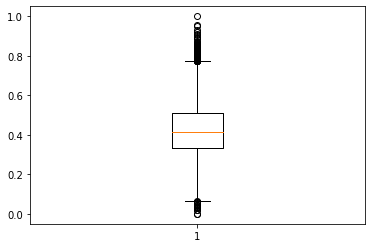

In [ ]:
plt.boxplot(train_data["sensor3"])
plt.show()

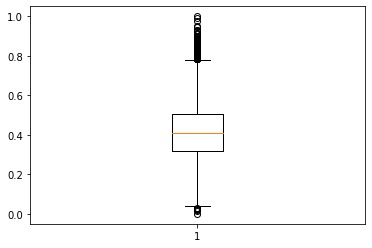

In [ ]:
plt.boxplot(test_data["sensor4"])
plt.show()

In [ ]:
outliers = train_data.columns.difference(['id','cycles_completed'])
outliers

Index(['RUL', 'sensor1', 'sensor10', 'sensor11', 'sensor12', 'sensor13',
       'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19',
       'sensor2', 'sensor20', 'sensor21', 'sensor3', 'sensor4', 'sensor5',
       'sensor6', 'sensor7', 'sensor8', 'sensor9', 'setting1', 'setting2',
       'setting3'],
      dtype='object')

In [ ]:
for i in outliers:
  median = train_data[i].quantile(0.50)
  x = train_data[i].quantile(0.95)
  y = train_data[i].quantile(0.05)
  train_data[i] = np.where(train_data[i] > x, median, train_data[i])
  train_data[i] = np.where(train_data[i] < y, median, train_data[i])

In [ ]:
for i in outliers:
  median = test_data[i].quantile(0.50)
  x = test_data[i].quantile(0.95)
  y = test_data[i].quantile(0.05)
  test_data[i] = np.where(test_data[i] > x, median, test_data[i])
  test_data[i] = np.where(test_data[i] < y, median, test_data[i])

In [ ]:
train_data.shape

(20630, 27)

In [ ]:
X = train_data.iloc[:, 5:26]
y = train_data.iloc[:, 26:27]

In [ ]:
X_train = train_data.iloc[:, 5:26]
X_train
y_train = train_data.iloc[:, 26:27]
y_train

RUL
0      190.0
1      189.0
2      188.0
3      187.0
4      186.0
...      ...
20625  103.0
20626  103.0
20627  103.0
20628  103.0
20629  103.0

[20630 rows x 1 columns]

In [ ]:
X_test = test_data.iloc[:, 5:26]
X_test
y_test = test_data.iloc[:, 26:27]
y_test

RUL
0      141.0
1      140.0
2      139.0
3      138.0
4      137.0
...      ...
13090  140.0
13091  140.0
13092  140.0
13093  140.0
13094  140.0

[13095 rows x 1 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_prediction = regressor.predict(X_test)

In [ ]:
y_prediction = pd.DataFrame(y_prediction)
y_prediction

0
0     124.817742
1     106.087611
2     148.659602
3     104.783630
4      57.227371
...          ...
6184  153.242288
6185  126.266356
6186  142.614748
6187    5.946943
6188   31.473486

[6189 rows x 1 columns]

In [ ]:
score = r2_score(y_test, y_prediction)
score

NameError: ignored